In [1]:
from event_analysis import optimise_pss
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import xarray as xr
from obs_read import read_sta
import pandas as pd

In [2]:
era5, df_aws, df_sta = optimise_pss("/g/data/eg3/ab4502/ExtremeWind/points/era5_allvars_v2_2005_2018.pkl",\
        T=1000, compute=False, l_thresh=2, is_pss="hss", model_name="era5_v3",\
        time="floor") 

In [12]:
z_aws = \
                    2.5e-4*df_aws["ml_el"] \
                    + 2.1e-1*df_aws["Umean03"]\
                    + 6.0e-4*df_aws["eff_lcl"]\
                    -2.0e-1*df_aws["dpd700"] \
                    +7.7e-1*df_aws["lr36"] \
                    - 1.8e-2*df_aws["rhmin01"] - 6.3
df_aws["logit"] = (( 1 / (1 + np.exp(-z_aws))) >= 0.81)*1
z_sta = \
                    1.2e-3*df_sta["ml_cape"] \
                    + 1.6e-1*df_sta["Umean06"]\
                    +7.4e-1*df_sta["lr13"] \
                    +1.9e-2*df_sta["srhe_left"] \
                    + 3.6e-2*df_sta["rhmin01"] - 8.8
df_sta["logit"] = (( 1 / (1 + np.exp(-z_sta))) >= 0.70)*1

In [20]:
df_sta[(df_sta.is_sta==1) & (df_sta.mu_cape<10) & (df_sta.logit==1)]

,stn_name,wind_gust,hourly_floor_sta,tc_affected,lightning,is_sta,time,lon,lat,ml_cape,...,Fs10,icon10,vgt10,conv10,vo10,cp,loc_id,is_lightning,is_conv_aws_cond_light,logit
25105,Perth,14.9,2005-08-17 16:00:00,0,0.0,1,2005-08-17 16:00:00,116.00,-32.00,0.000,...,-3.177783,7.920632,25.489788,-0.532509,-19.528061,2.416968e-05,Perth,0,NaN,1
25446,Perth,13.4,2006-07-24 01:00:00,0,0.0,1,2006-07-24 01:00:00,116.00,-32.00,0.000,...,6.378529,3.258310,13.258073,-3.150040,8.509369,1.746267e-04,Perth,0,NaN,1
25784,Perth,11.3,2007-06-27 11:00:00,0,0.0,1,2007-06-27 11:00:00,116.00,-32.00,0.000,...,3.769157,2.772465,15.338538,-4.942055,10.043404,2.964512e-04,Perth,0,NaN,1
25806,Perth,21.6,2007-07-19 06:00:00,0,0.0,1,2007-07-19 06:00:00,116.00,-32.00,0.000,...,0.629481,2.144582,12.159491,-5.683319,4.012817,0.000000e+00,Perth,0,NaN,1
26236,Perth,22.6,2008-09-21 03:00:00,0,0.0,1,2008-09-21 03:00:00,116.00,-32.00,0.000,...,-19.832726,7.417845,27.549839,0.250107,-23.370743,1.038536e-04,Perth,0,NaN,1
28664,Perth,20.6,2015-05-16 04:00:00,0,0.0,1,2015-05-16 04:00:00,116.00,-32.00,0.000,...,3.911099,2.852932,11.360814,-2.988266,6.674614,0.000000e+00,Perth,0,NaN,1
29084,Perth,13.9,2016-07-09 14:00:00,0,15.0,1,2016-07-09 14:00:00,116.00,-32.00,0.000,...,0.052691,7.769057,17.072102,3.510040,-11.595764,1.305118e-04,Perth,1,0.0,1
30638,Esperance,25.7,2006-10-11 06:00:00,0,0.0,1,2006-10-11 06:00:00,122.00,-33.75,0.000,...,0.439638,12.778841,18.431850,15.319939,-0.470306,0.000000e+00,Esperance,0,NaN,1
30937,Esperance,22.6,2007-08-06 07:00:00,0,0.0,1,2007-08-06 07:00:00,122.00,-33.75,0.000,...,0.361726,9.950464,14.476220,9.386337,3.301666,0.000000e+00,Esperance,0,NaN,1
31760,Esperance,33.4,2009-11-06 12:00:00,0,0.0,1,2009-11-06 12:00:00,122.00,-33.75,0.000,...,2.686436,5.563181,12.850507,-1.520210,-1.699623,6.034970e-07,Esperance,0,NaN,1


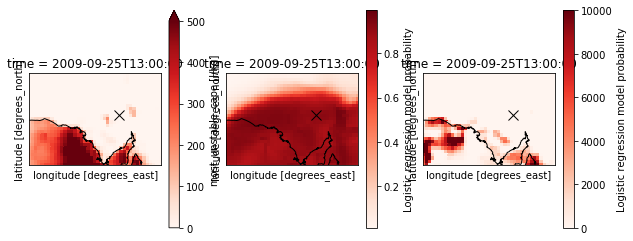

In [47]:
                
#Plot for Woomera (-31.25, 136.75) for 2007-10-27 09:00
plt.figure(figsize=[10,4])
plt.subplot(1,3,1)
m = Basemap(llcrnrlon=130, llcrnrlat=-35, urcrnrlon=140, urcrnrlat=-28,projection="cyl",resolution="i")
f = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/era5/era5_20090901_20090930.nc")\
        .sel({"time":"2009-09-25 13:00:00", "lat":slice(-25, -45), "lon":slice(130,150)})
f.mu_cape.plot(vmax=500, cmap=plt.get_cmap("Reds"))
m.plot(136.8054, -31.1558, "x", color="k", ms=10)
m.drawcoastlines()

plt.subplot(1,3,2)
z_sta = \
                    1.2e-3*f["ml_cape"] \
                    + 1.6e-1*f["Umean06"]\
                    +7.4e-1*f["lr13"] \
                    +1.9e-2*f["srhe_left"] \
                    + 3.6e-2*f["rhmin01"] - 8.8
logit = ( 1 / (1 + np.exp(-z_sta)))
c=logit.plot(cmap=plt.get_cmap("Reds"), add_colorbar=False)
m.drawcoastlines()
m.plot(136.8054, -31.1558, "x", color="k", ms=10)
cb=plt.colorbar(c)
cb.set_label("Logistic regression model probability")

plt.subplot(1,3,3)
c=f["mlcape*s06"].plot(cmap=plt.get_cmap("Reds"), add_colorbar=False, vmax=10000)
m.drawcoastlines()
m.plot(136.8054, -31.1558, "x", color="k", ms=10)
cb=plt.colorbar(c)
cb.set_label("Logistic regression model probability")

plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/zero_instability_case1.png", bbox_inches="tight")

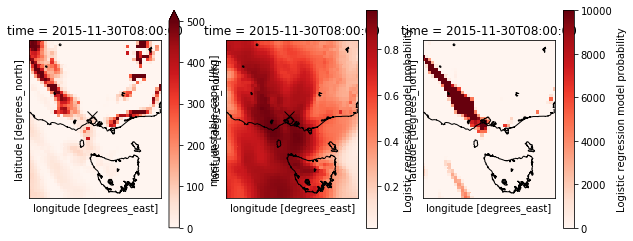

In [49]:
                
#Plot for Woomera (-31.25, 136.75) for 2007-10-27 09:00
plt.figure(figsize=[10,4])
plt.subplot(1,3,1)
m = Basemap(llcrnrlon=140, llcrnrlat=-44, urcrnrlon=150, urcrnrlat=-32,projection="cyl",resolution="i")
f = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/era5/era5_20151101_20151130.nc")\
        .sel({"time":"2015-11-30 08:00:00", "lat":slice(-25, -45), "lon":slice(130,150)})
f.mu_cape.plot(vmax=500, cmap=plt.get_cmap("Reds"))
m.drawcoastlines()
m.plot(144.75,-37.75, "x", color="k", ms=10)

plt.subplot(1,3,2)
z_sta = \
                    1.2e-3*f["ml_cape"] \
                    + 1.6e-1*f["Umean06"]\
                    +7.4e-1*f["lr13"] \
                    +1.9e-2*f["srhe_left"] \
                    + 3.6e-2*f["rhmin01"] - 8.8
logit = ( 1 / (1 + np.exp(-z_sta)))
c=logit.plot(cmap=plt.get_cmap("Reds"), add_colorbar=False)
m.drawcoastlines()
cb=plt.colorbar(c)
m.plot(144.75,-37.75, "x", color="k", ms=10)
cb.set_label("Logistic regression model probability")

plt.subplot(1,3,3)
c=f["mlcape*s06"].plot(cmap=plt.get_cmap("Reds"), add_colorbar=False, vmax=10000)
m.drawcoastlines()
m.plot(136.8054, -31.1558, "x", color="k", ms=10)
cb=plt.colorbar(c)
cb.set_label("Logistic regression model probability")

plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/zero_instability_case2.png", bbox_inches="tight")

In [35]:
        sta = read_sta()

In [37]:
print(sta[sta.daily_date=="2009-09-25"].Comments.values)
print(sta[sta.daily_date=="2015-11-30"].Comments.values)

[' strong frontal system crossed sa, with strong-gale force w to sw winds and localised severe convective squalls.'
 ' strong frontal system crossed sa, with strong-gale force w to sw winds and localised severe convective squalls.'
 ' strong frontal system crossed sa, with strong-gale force w to sw winds and localised severe convective squalls.'
 ' strong frontal system crossed sa, with strong-gale force w to sw winds and localised severe convective squalls.'
 'woomera : severe wsw winds with gust to 100 km/h for 45 minutes from 12:45 pm. strong frontal system crossed sa, with strong-gale force w to sw winds and localised severe convective squalls.']
['nhill aerodrome gust of 65knots (120km/h) recorded at 3:55pm edt. '
 'st kilda harbour gust recorded of 63knots at 1915edt line of convection of only moderate intensity on radar moved through the melbourne area producing significant wind gusts.'
 'fawkner beacon gust recorded of 62knots at 1918edt line of convection of only moderate inte

In [36]:
#df_aws.set_index(["stn_name","time"]).loc[["Adelaide",slice("2007-05-01 00:00","2007-05-01 23:00")]]
df_aws[df_aws.stn_name=="Melbourne"].set_index("time").loc[slice("2015-11-30 00:00","2015-11-30 23:00")]

,stn_name,wind_gust,hourly_floor_utc,tc_affected,lightning,is_sta,lon,lat,ml_cape,mu_cape,...,Fs10,icon10,vgt10,conv10,vo10,cp,loc_id,is_conv_aws,is_conv_aws_cond_light,logit
time,,,,,,,,,,,,,,,,,,,,,
2015-11-30 07:00:00,Melbourne,21.6,2015-11-30 07:00:00,0,27.0,1,144.75,-37.75,0.0,0.0,...,0.30166,7.248049,10.864419,4.931038,-1.49334,0.000002,Melbourne,0,NaN,1


In [21]:
df_aws.columns

Index(['stn_name', 'wind_gust', 'hourly_floor_utc', 'tc_affected', 'lightning',
       'is_sta', 'time', 'lon', 'lat', 'ml_cape',
       ...
       'Fs10', 'icon10', 'vgt10', 'conv10', 'vo10', 'cp', 'loc_id',
       'is_conv_aws', 'is_conv_aws_cond_light', 'logit'],
      dtype='object', length=125)

In [97]:
df_sta2[df_sta2.is_sta==1]

,stn_name,wind_gust,hourly_floor_utc,tc_affected,lightning,is_sta,time,lon,lat,ml_cape,...,Fn10,Fs10,icon10,vgt10,conv10,vo10,cp,loc_id,is_lightning,is_conv_aws_cond_light
341,Halls Creek,27.3,2005-12-08 05:00:00,0,27.0,1,2005-12-08 05:00:00,127.75,-18.25,836.0625,...,0.615797,-0.215367,2.272002,5.859924,-0.858139,2.102173,0.000012,Halls Creek,1,NaN
2545,Halls Creek,NaN,2011-12-21 13:00:00,0,87.0,1,2011-12-21 13:00:00,127.75,-18.25,580.5000,...,3.561177,-1.220587,-0.915375,11.880946,-9.139809,2.048996,0.000159,Halls Creek,1,NaN
7737,Broome,22.1,2014-01-25 13:00:00,0,1158.0,1,2014-01-25 13:00:00,122.25,-17.75,1386.8750,...,-6.713584,-2.289180,7.519111,10.989860,6.071808,-1.874458,-0.000000,Broome,1,0.0
8145,Broome,11.3,2015-03-09 07:00:00,0,956.0,1,2015-03-09 07:00:00,122.25,-17.75,3031.7500,...,-0.045068,0.167460,1.305891,3.918015,1.240578,3.454216,0.000770,Broome,1,0.0
8414,Broome,21.1,2015-12-03 08:00:00,0,877.0,1,2015-12-03 08:00:00,122.25,-17.75,2222.1875,...,-3.630336,-1.533866,4.220119,6.344526,5.735245,0.207260,0.000000,Broome,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170716,Melbourne,18.0,2016-12-29 03:00:00,0,888.0,1,2016-12-29 03:00:00,144.75,-37.75,760.4375,...,-0.473261,0.641547,5.210880,8.217284,4.555077,-3.515266,0.000022,Melbourne,1,0.0
171474,Hobart,14.4,2005-01-26 08:00:00,0,59.0,1,2005-01-26 08:00:00,147.25,-43.00,493.8750,...,8.333770,-4.970283,4.627444,10.199179,0.793022,-5.638374,0.000164,Hobart,1,0.0
174775,Hobart,36.0,2014-02-09 04:00:00,0,80.0,1,2014-02-09 04:00:00,147.25,-43.00,0.0000,...,20.973850,5.812058,1.778972,12.569022,-6.004829,5.520493,0.000133,Hobart,1,NaN
175098,Hobart,27.8,2014-12-29 01:00:00,0,461.0,1,2014-12-29 01:00:00,147.25,-43.00,172.1250,...,-0.425529,-2.770896,6.003255,17.491177,4.414246,-15.126572,0.000037,Hobart,1,NaN


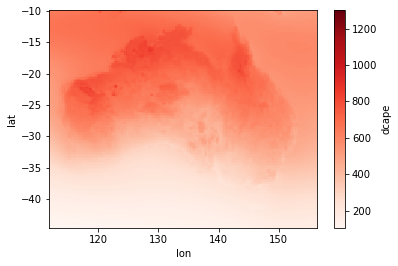

In [53]:
xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/threshold_data/era5_dcape_6hr_mean.nc").dcape.mean("time").plot(vmax=1300, cmap=plt.get_cmap("Reds"))